# Imports

In [12]:
import pathlib
import csv
import pandas as pd
from tqdm import tqdm_notebook as tqdm

# Load Data

In [7]:
data_folder = pathlib.Path('../data/raw/BASE DE DADOS - PAULO JR VARELA/')

In [99]:
with open('../data/data_raw.csv', 'w', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['SUBJECT', 'AUTHOR', 'TEXT'])
    for subject_folder in tqdm(data_folder.iterdir()):
        if not subject_folder.name.startswith('.'):
            subject = subject_folder.name
            for author_folder in subject_folder.iterdir():
                if not author_folder.name.startswith('.'):
                    author = author_folder.name
                    for file in author_folder.glob('*.txt'):
                        with open(str(file), 'r', encoding='iso-8859-1') as f:
                            content = f.read()
                            writer.writerow([subject, author, content])
                            f.close()
        

In [26]:
df_raw = pd.read_csv('../data/data_raw.csv')

In [27]:
df_raw.head()

,SUBJECT,AUTHOR,TEXT
0,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,19/03/2009\nFATO CORRIQUEIRO\nO fato mais impo...
1,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,06/07/2009\nPOLÍTICA DE ESTADO\nUm problema cr...
2,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,12/07/2009\nTOQUE DE RECOLHER\nProcurado para ...
3,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,23/03/2009\nCRISE SOCIOEDUCATIVA\nOcorreram du...
4,ASSUNTOS VARIADOS,LUIZ FLAVIO SAPORI,24/12/2008\nESTATÍSTICAS CRIMINAIS CONFIÁVEIS\...


In [63]:
df_raw['SUBJECT'] = df_raw['SUBJECT'].astype('category')
df_raw['AUTHOR'] = df_raw['AUTHOR'].astype('category')

In [64]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 3 columns):
SUBJECT    3003 non-null category
AUTHOR     3003 non-null category
TEXT       3003 non-null object
dtypes: category(2), object(1)
memory usage: 35.6+ KB


# Viz

In [80]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

sns.set_style("whitegrid")
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 
sns.set(font_scale=1.5)

font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

%matplotlib inline

In [62]:
df_raw = pd.read_csv('../data/data_raw.csv')
df_raw['SUBJECT'] = df_raw['SUBJECT'].astype('category')
df_raw['AUTHOR'] = df_raw['AUTHOR'].astype('category')

In [86]:
#df_raw['AUTHOR'].value_counts().plot(kind='bar')

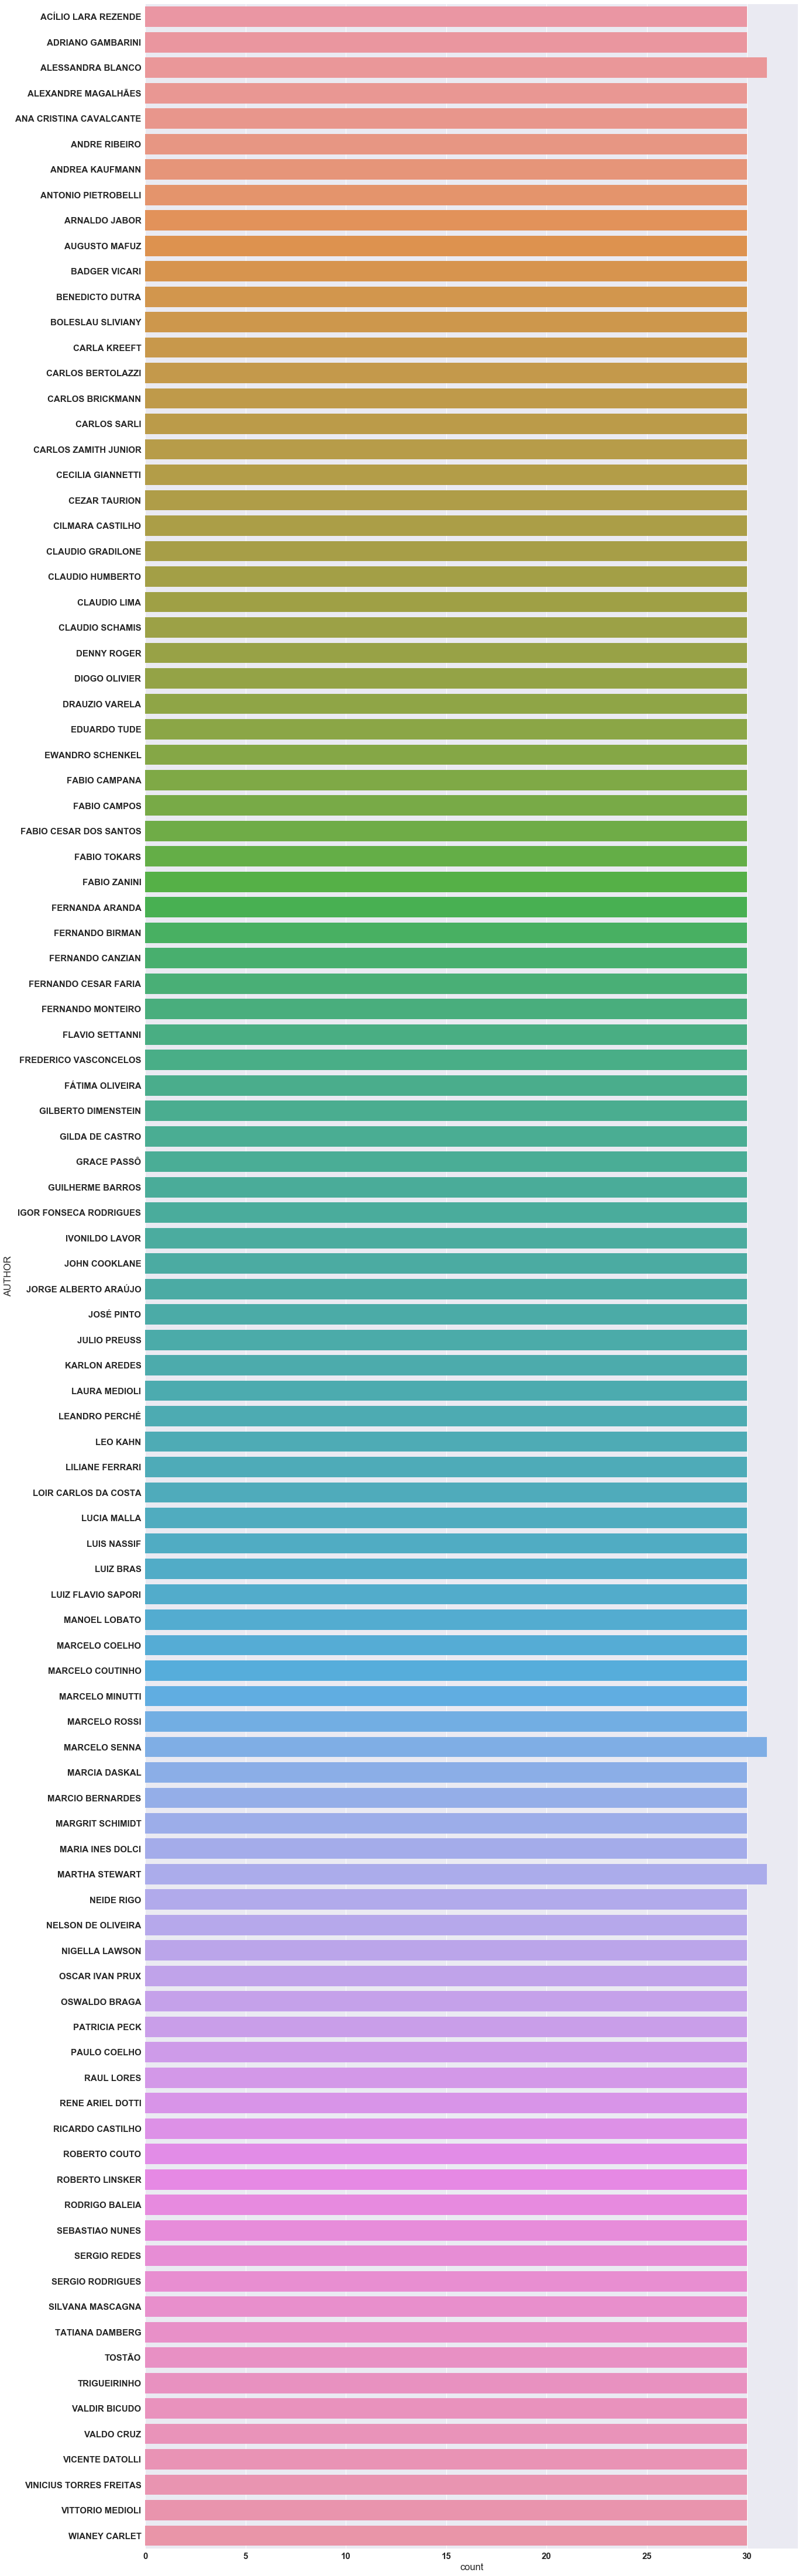

In [94]:
f, ax = plt.subplots(figsize=(20, 80))
sns.countplot(y="AUTHOR", data=df_raw);

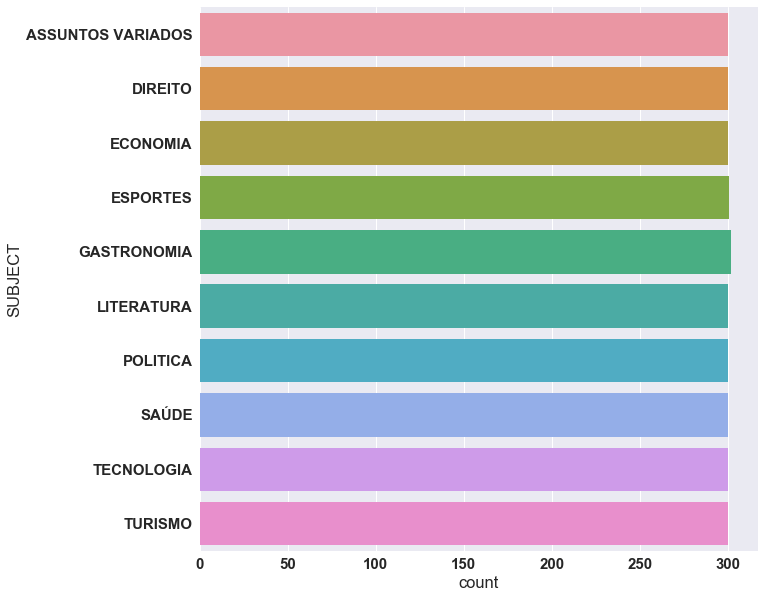

In [82]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="SUBJECT", data=df_raw);

In [97]:
# f, ax = plt.subplots(figsize=(50, 100))
# sns.countplot(y="SUBJECT", hue="AUTHOR", data=df_raw)

In [98]:
sns.catplot(x="AUTHOR", col="SUBJECT",
...                 data=df_raw, kind="count",
...                 height=4, aspect=.7);

AttributeError: module 'seaborn' has no attribute 'catplot'

# TODO

- wordcloud by author
- wordcloud by subject
- [scattertext](https://kanoki.org/2019/03/17/text-data-visualization-in-python/)
- df_prep.hist(figsize=(10,10));
- sns.distplot(df_prep['num_stopwords'])